# Совместная работа по машинному обучения

### Группа выполнившая работу
* ##### 22П-1

### Состав команды
* ##### Рахмаев Данил
* ##### Петрова Яна

## Подключение библиотек

In [50]:
import pandas
import pandas as pd
import numpy as np
import nltk
import string
import re
import pymorphy3
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Подключение датасета

In [53]:
df = pd.read_csv("real_estate_data.csv")

In [54]:
df.head(10)

,id,type,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,furnished,heating_type,price,price_currency
0,1,Konut,Rezidans,12/10/18,1/9/19,2,30,0,20 ve üzeri,2,2+1,90.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,3500.0,TRY
1,2,Konut,Daire,2/13/19,NaN,1,14,0,20 ve üzeri,20 ve üzeri,1+0,43.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,490000.0,TRY
2,3,Konut,Daire,10/9/18,11/8/18,1,30,0,1,Yüksek Giriş,2+1,NaN,Tekirdağ/Çorlu/Reşadiye,NaN,Fancoil,155000.0,TRY
3,4,Konut,Rezidans,9/10/18,10/10/18,1,30,3,20 ve üzeri,20 ve üzeri,6+1,450.0,İstanbul/Beşiktaş/Levent,NaN,Fancoil,32500000.0,TRY
4,5,Konut,Rezidans,12/10/18,1/9/19,1,30,0,20 ve üzeri,2,2+1,90.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,1450000.0,TRY
5,6,Konut,Rezidans,11/9/18,12/9/18,1,30,2,10-20 arası,10,1+1,45.0,İstanbul/Maltepe/Altayçeşme,NaN,Fancoil,780000.0,TRY
6,7,Konut,Daire,1/4/19,NaN,2,54,0,20 ve üzeri,14,3+1,160.0,İstanbul/Kartal/Kordonboyu,NaN,Fancoil,3750.0,TRY
7,8,Konut,Villa,10/3/18,1/3/19,1,92,0,4,NaN,4+1,NaN,İzmir/Urla/M. Fevzi Çakmak,NaN,Fancoil,1500000.0,TRY
8,9,Konut,Daire,2/16/19,NaN,1,11,NaN,2,Kot 2,3+1,140.0,Çanakkale/Ayvacık/Küçükkuyu Bld. (Mıhlı),NaN,Fancoil,1500000.0,TRY
9,10,Konut,Daire,12/26/18,12/26/18,1,0,1,1,Asma Kat,2+2,550.0,İstanbul/Fatih/Sarıdemir,NaN,Fancoil,84256.0,GBP


## Описание данных

* id — Уникальный номер объявления.
* type — Основной тип недвижимости.и
* sub_type — Подтип недвижимости.
* start_date — Дата размещения объявления.
* end_date — Дата снятия объявления.
* listing_type — Тип предложения (продажа или аренда).
* tom — Срок активности на рынке в днях.
* building_age — Возраст здания.
* total_floor_count — Общее количество этажей в здании.
* floor_no — Этаж расположения объекта.
* room_count — Количество комнат.
* size — Площадь объекта.
* address — Адрес объекта.
* furnished — Уровень меблировки.
* heating_type — Тип отопления.
* price — Цена объекта.
* price_currency — Валюта цены.
  
**Целевой признак - Price (Цена объекта недвижимости).**

## Разведочный анализ данных

In [60]:
df.shape #Количества строк и признаков

(403487, 17)

* В датасете присутствует 403487 записи, и 17 полей для записей

In [63]:
df.dtypes #Признаки и их тип

id                     int64
type                  object
sub_type              object
start_date            object
end_date              object
listing_type           int64
tom                    int64
building_age          object
total_floor_count     object
floor_no              object
room_count            object
size                 float64
address               object
furnished            float64
heating_type          object
price                float64
price_currency        object
dtype: object

* В датасете приобладает строковый тип данных

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403487 entries, 0 to 403486
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 403487 non-null  int64  
 1   type               403487 non-null  object 
 2   sub_type           403487 non-null  object 
 3   start_date         403487 non-null  object 
 4   end_date           266298 non-null  object 
 5   listing_type       403487 non-null  int64  
 6   tom                403487 non-null  int64  
 7   building_age       376097 non-null  object 
 8   total_floor_count  375466 non-null  object 
 9   floor_no           368191 non-null  object 
 10  room_count         403487 non-null  object 
 11  size               257481 non-null  float64
 12  address            403487 non-null  object 
 13  furnished          0 non-null       float64
 14  heating_type       375517 non-null  object 
 15  price              402772 non-null  float64
 16  pr

* При анализе общений информации, можно заметить, что в датасете присутствуют пропуски в полях

In [69]:
# Выявление признаков с пропусками
for col in df.columns:
    print('Кол-во пропусков в колонке %s = %d' % (col, df[col].isna().sum()))

Кол-во пропусков в колонке id = 0
Кол-во пропусков в колонке type = 0
Кол-во пропусков в колонке sub_type = 0
Кол-во пропусков в колонке start_date = 0
Кол-во пропусков в колонке end_date = 137189
Кол-во пропусков в колонке listing_type = 0
Кол-во пропусков в колонке tom = 0
Кол-во пропусков в колонке building_age = 27390
Кол-во пропусков в колонке total_floor_count = 28021
Кол-во пропусков в колонке floor_no = 35296
Кол-во пропусков в колонке room_count = 0
Кол-во пропусков в колонке size = 146006
Кол-во пропусков в колонке address = 0
Кол-во пропусков в колонке furnished = 403487
Кол-во пропусков в колонке heating_type = 27970
Кол-во пропусков в колонке price = 715
Кол-во пропусков в колонке price_currency = 715


* Анализ показал что пропуски есть в половине признаков

In [72]:
# Статистика для всех (числовых) признаков
df.describe()

,id,listing_type,tom,size,furnished,price
count,403487.00000,403487.000000,403487.000000,257481.000000,0.0,4.027720e+05
mean,201744.00000,1.294235,57.022739,279.349094,NaN,3.546417e+05
std,116476.80837,0.467733,44.358933,9429.195331,NaN,4.809503e+06
min,1.00000,1.000000,0.000000,1.000000,NaN,-2.500000e+02
25%,100872.50000,1.000000,29.000000,85.000000,NaN,2.500000e+03
50%,201744.00000,1.000000,40.000000,110.000000,NaN,1.990000e+05
75%,302615.50000,2.000000,90.000000,140.000000,NaN,3.420000e+05
max,403487.00000,3.000000,180.000000,948235.000000,NaN,2.000000e+09


In [74]:
# Проверим некорректные цены
negative_prices = df[df['price'] <= 0]
print(f"Объявлений с отрицательной или нулевой ценой: {len(negative_prices)}")

Объявлений с отрицательной или нулевой ценой: 45


In [76]:
# Записи с некорректной ценой
negative_zero_prices = df[df['price'] <= 0]
display(negative_zero_prices[['id', 'type', 'sub_type', 'price', 'price_currency', 'size', 'room_count', 'address']])

,id,type,sub_type,price,price_currency,size,room_count,address
941,942,Konut,Rezidans,0.0,TRY,55.0,1+1,İstanbul/Ataşehir/Küçükbakkalköy
1173,1174,Konut,Komple Bina,0.0,TRY,NaN,+,İzmir/Konak/Duatepe
1181,1182,Konut,Rezidans,0.0,TRY,55.0,1+1,İstanbul/Ataşehir/Küçükbakkalköy
1356,1357,Konut,Rezidans,0.0,TRY,NaN,1+1,İzmir/Buca/Yıldız
25130,25131,Konut,Yazlık,0.0,TRY,NaN,2+1,Muğla/Fethiye/Kayaköy
33965,33966,Konut,Yazlık,0.0,TRY,NaN,1+1,İzmir/Çeşme/Çiftlik
75354,75355,Konut,Daire,0.0,TRY,NaN,1+0,İstanbul/Bakırköy/Cevizlik
77016,77017,Konut,Daire,0.0,TRY,NaN,3+1,Aydın/Didim/Efeler
79139,79140,Konut,Daire,0.0,TRY,NaN,1+0,İstanbul/Beylikdüzü/Cumhuriyet
79722,79723,Konut,Villa,0.0,TRY,NaN,4+1,Aydın/Didim/Akbük


In [78]:
# Проверим нулевую или отрицательную площадь
invalid_size = df[df['size'] <= 0]
print(f"Объявлений с некорректной площадью: {len(invalid_size)}")

Объявлений с некорректной площадью: 0


In [80]:
# Посмотрим уникальные значения room_count
print("Уникальные значения room_count:")
print(df['room_count'].value_counts().head(20))

Уникальные значения room_count:
room_count
3+1     157363
2+1     138677
1+1      39134
4+1      37472
5+1       8219
4+2       4540
5+2       2926
+         2898
3+2       2673
1+0       2612
6+1       2001
6+2       1517
2+2        836
7+1        523
7+2        428
10+0       313
8+1        218
8+2        189
6+3        167
5+3        139
Name: count, dtype: int64


In [82]:
# Записи с некорректным количеством ("+")
invalid_room_count = df[df['room_count'] == '+']
display(invalid_room_count[['id', 'type', 'sub_type', 'price', 'room_count', 'size', 'address']].head(20))

,id,type,sub_type,price,room_count,size,address
107,108,Konut,Komple Bina,757878.0,+,225.0,Ankara/Elmadağ/Hasanoğlan Havuzbaşı
259,260,Konut,Komple Bina,757878.0,+,225.0,Ankara/Elmadağ/Hasanoğlan Havuzbaşı
495,496,Konut,Komple Bina,12500.0,+,905.0,Kocaeli/İzmit/Alikahya Fatih
499,500,Konut,Komple Bina,1650000.0,+,200.0,Kocaeli/Gebze/Gaziler
515,516,Konut,Komple Bina,1300000.0,+,NaN,İzmir/Bayraklı/Fuat Edip Baksı
521,522,Konut,Komple Bina,1200000.0,+,232.0,Samsun/İlkadım/İstasyon
523,524,Konut,Komple Bina,1300000.0,+,NaN,İzmir/Bayraklı/Fuat Edip Baksı
525,526,Konut,Komple Bina,785000.0,+,550.0,İstanbul/Bağcılar/Göztepe
537,538,Konut,Komple Bina,9000.0,+,450.0,Antalya/Muratpaşa/Çağlayan
547,548,Konut,Komple Bina,1200000.0,+,NaN,İstanbul/Sultangazi/Uğur Mumcu


In [84]:
# Распределение валют
print("Распределение валют в данных:")
print(df['price_currency'].value_counts())

Распределение валют в данных:
price_currency
TRY    400677
EUR       922
GBP       621
USD       552
Name: count, dtype: int64


## Визуальный анализ до обработки данных

In [87]:
df_before = df.copy()

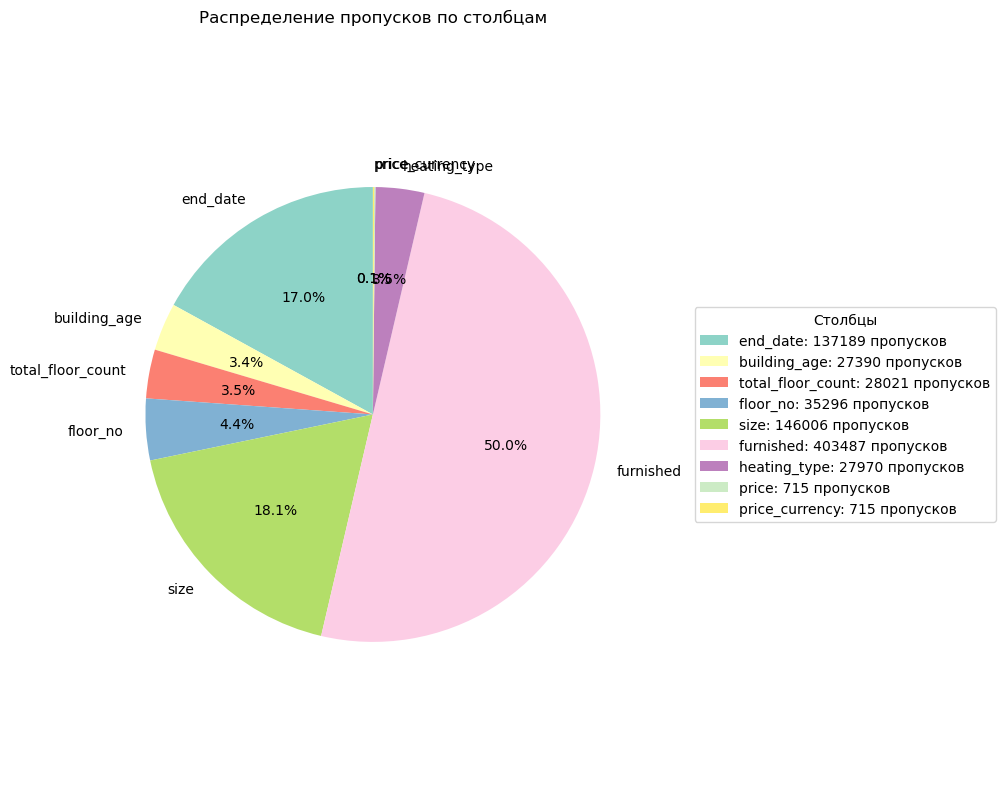

In [103]:
# Визуализация отсутствия данных
missing_before = df_before.isnull().sum()
missing_before = missing_before[missing_before > 0]

total_missing = missing_before.sum()
missing_percent = (missing_before / total_missing) * 100

plt.figure(figsize=(10, 8))
colors = plt.cm.Set3(np.linspace(0, 1, len(missing_before)))
wedges, texts, autotexts = plt.pie(missing_percent, labels=missing_before.index, autopct='%1.1f%%', colors=colors, startangle=90)

plt.title('Распределение пропусков по столбцам', fontsize=12, pad=20)
plt.axis('equal')

legend_labels = [f'{label}: {value} пропусков' for label, value in zip(missing_before.index, missing_before)]
plt.legend(wedges, legend_labels, title="Столбцы", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()

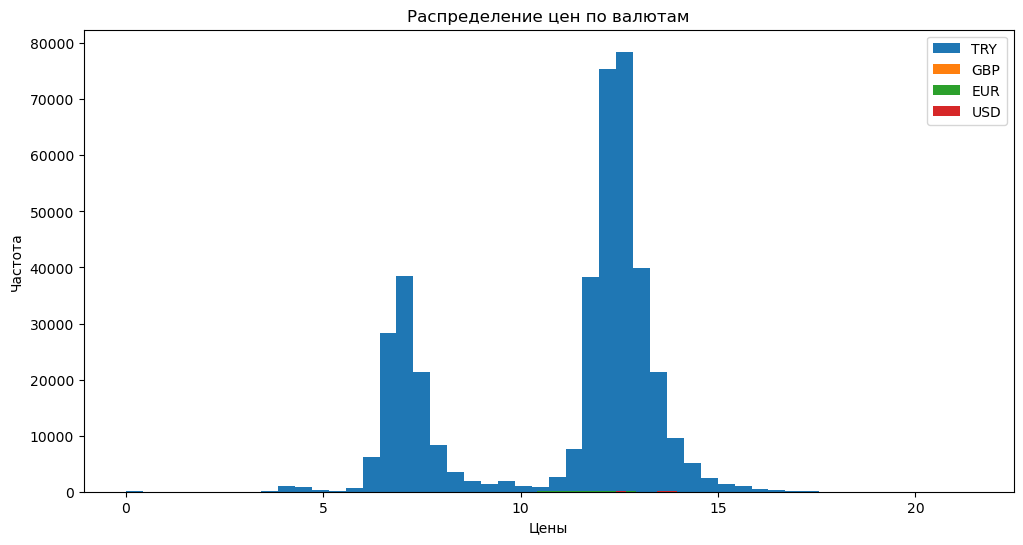

In [371]:
# Визуализация распределения цен по разным валютам
plt.figure(figsize=(12, 6))
for currency in df_before['price_currency'].unique():
    if pd.notna(currency):
        subset = df_before[df_before['price_currency'] == currency]
        plt.hist(np.log1p(subset['price']), bins=50, label=currency)
plt.title('Распределение цен по валютам')
plt.xlabel('Цены')
plt.ylabel('Частота')
plt.legend()
plt.show()

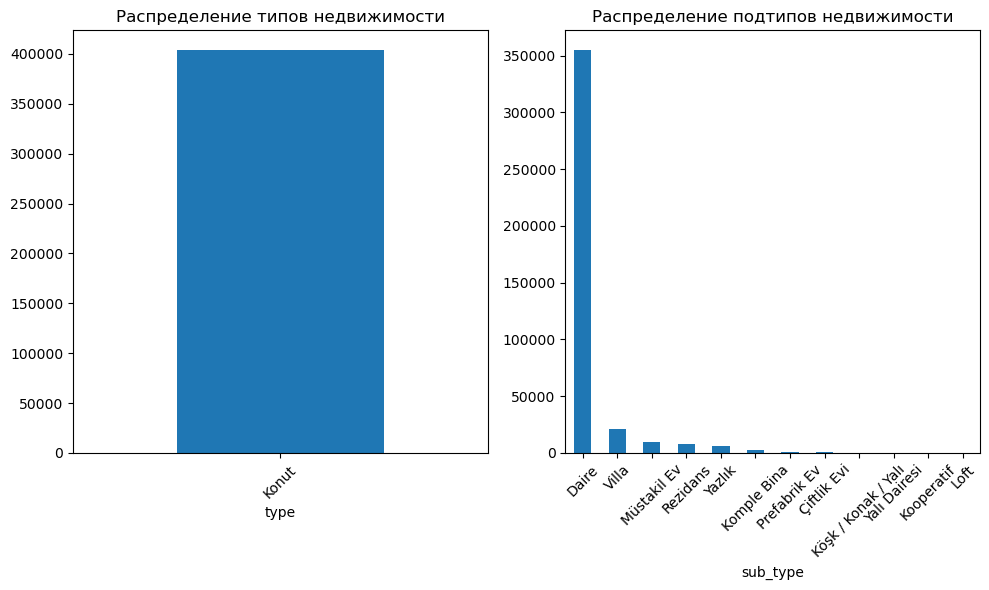

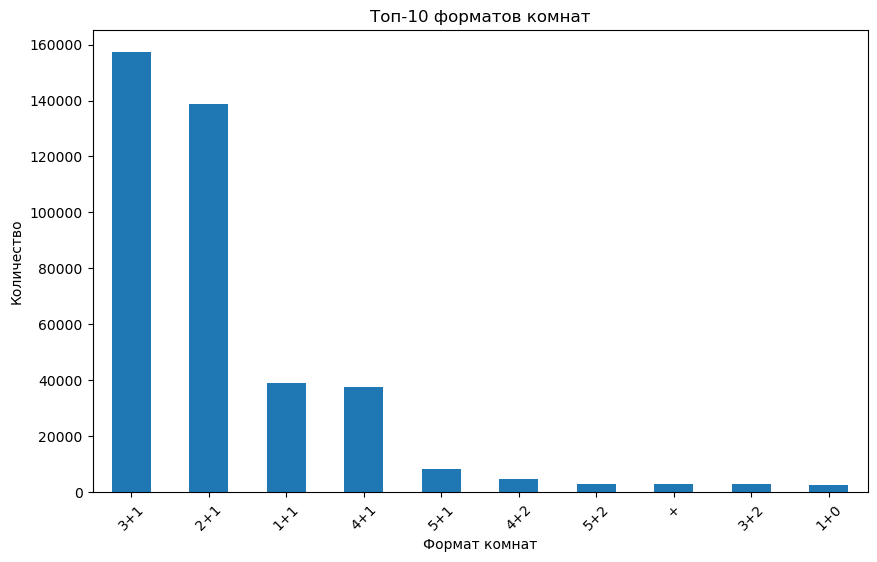

In [107]:
# Распределение типов недвижимости
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

df_before['type'].value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title('Распределение типов недвижимости')
axes[0].tick_params(axis='x', rotation=45)

df_before['sub_type'].value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title('Распределение подтипов недвижимости')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Распределение формата комнат
plt.figure(figsize=(10, 6))
df_before['room_count'].value_counts().head(10).plot(kind='bar')
plt.title('Топ-10 форматов комнат')
plt.xlabel('Формат комнат')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.show()

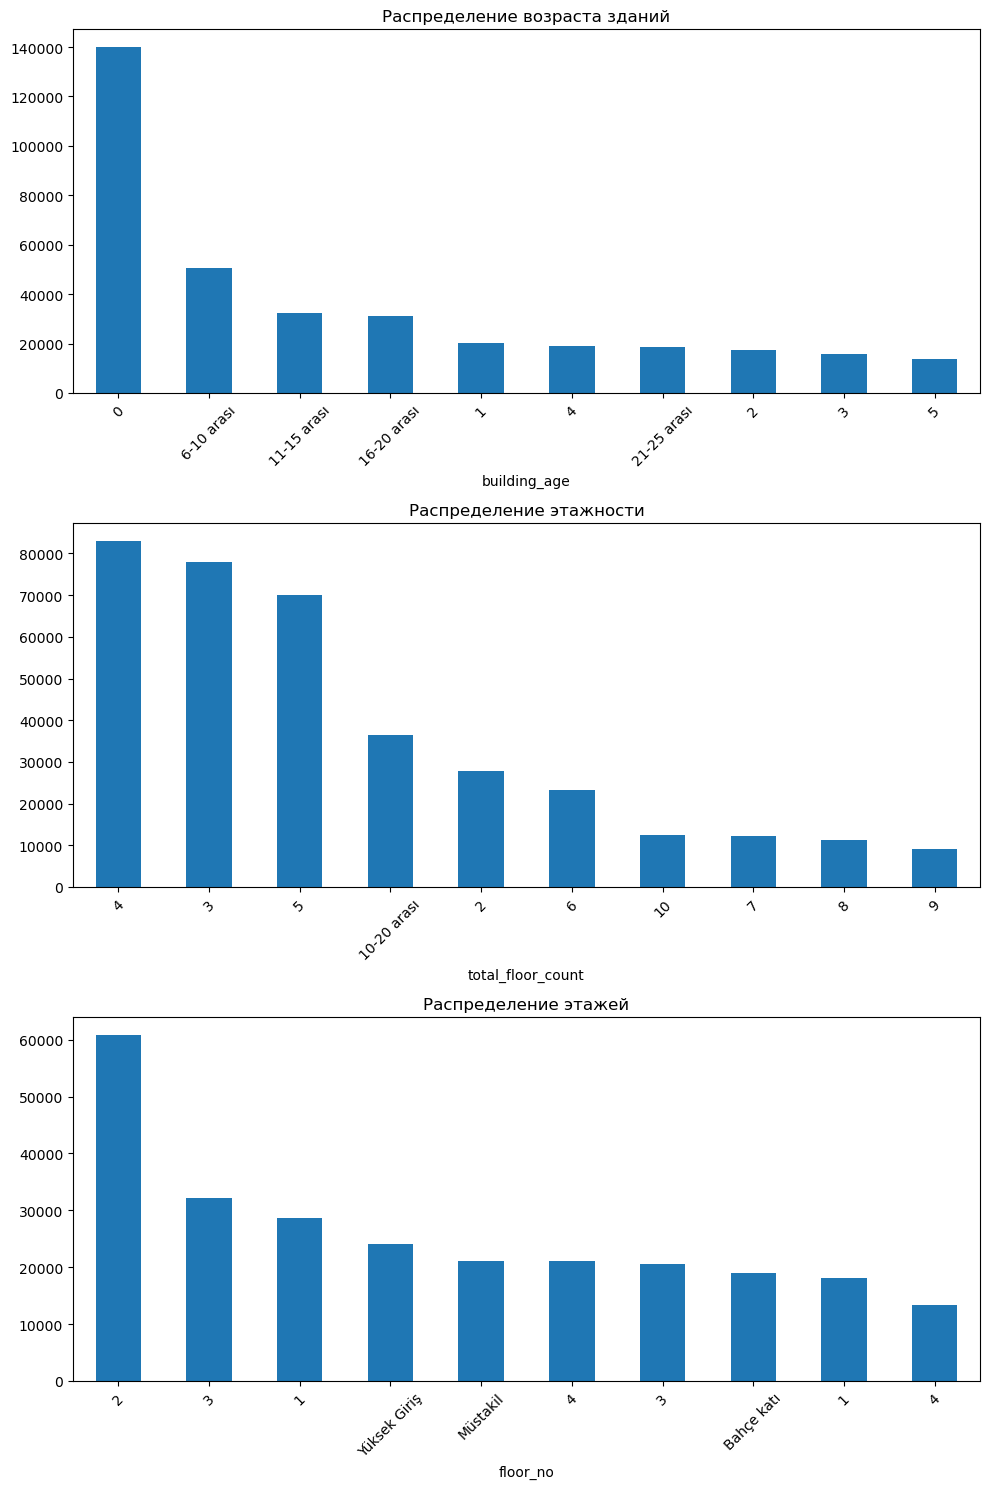

In [137]:
# Распределение типов в building_age, total_floor_count, floor_no
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

df_before['building_age'].value_counts().head(10).plot(kind='bar', ax=axes[0])
axes[0].set_title('Распределение возраста зданий')
axes[0].tick_params(axis='x', rotation=45)

df_before['total_floor_count'].value_counts().head(10).plot(kind='bar', ax=axes[1])
axes[1].set_title('Распределение этажности')
axes[1].tick_params(axis='x', rotation=45)

df_before['floor_no'].value_counts().head(10).plot(kind='bar', ax=axes[2])
axes[2].set_title('Распределение этажей')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

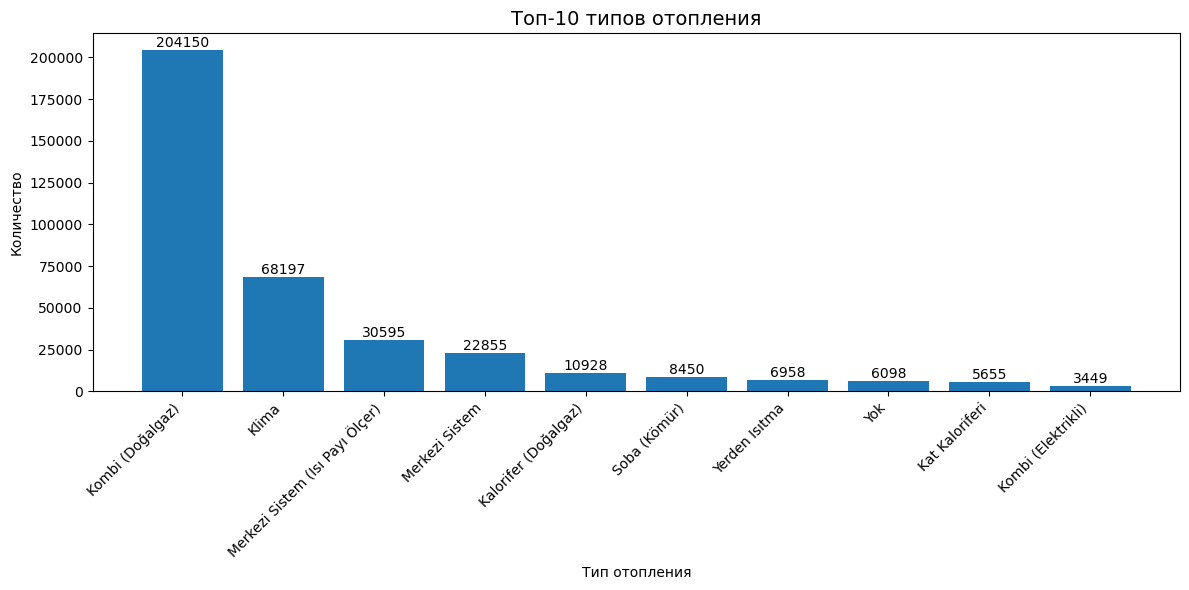

In [135]:
# Распределение типов отопления
heating_counts = df_before['heating_type'].value_counts().head(10)

plt.figure(figsize=(12, 6))
bars = plt.bar(heating_counts.index, heating_counts.values)
plt.title('Топ-10 типов отопления', fontsize=14)
plt.xlabel('Тип отопления')
plt.ylabel('Количество')
plt.xticks(rotation=45, ha='right')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5, f'{int(height)}', ha='center', va='bottom')
plt.tight_layout()
plt.show()

## Предварительная обработка данных

In [142]:
# Удаляем записи с некорректной ценой
df = df[df['price'] > 0]
print(f"Осталось записей после удаления: {len(df)}")

Осталось записей после удаления: 402727


In [144]:
# Проверим некорректные цены
negative_prices = df[df['price'] <= 0]
print(f"Объявлений с отрицательной или нулевой ценой: {len(negative_prices)}")

Объявлений с отрицательной или нулевой ценой: 0


In [146]:
exchange_rates = {
    'TRY': 1.96, # Турецкая лира к рублю
    'USD': 80.43, # Доллар к рублю
    'EUR': 94.38, # Евро к рублю
    'GBP': 108.65, # Фунт стерлингов к рублю
}

# Функция для конвертации цены в рубли
def convert_price_to_rub(row):
    currency = row['price_currency']
    if currency in exchange_rates:
        return row['price'] * exchange_rates[currency]
    return row['price']

In [148]:
# Применяем конвертацию к столбцу price
df['price'] = df.apply(convert_price_to_rub, axis=1)

# Меняем все валюты на RUB
df['price_currency'] = 'RUB'

In [149]:
# Проверяем результат
print("Распределение валют после конвертации:")
print(df['price_currency'].value_counts())

Распределение валют после конвертации:
price_currency
RUB    402727
Name: count, dtype: int64


In [150]:
# Функция для преобразования room_count
def convert_room_count(room_str):
    if room_str == '+':
        return None
    try:
        parts = room_str.split('+')
        if len(parts) == 2:
            return int(parts[0]) + int(parts[1])
        else:
            return None
    except:
        return None

In [151]:
df['room_count'] = df['room_count'].apply(convert_room_count)
print("Распределение количества комнат после преобразования:")
print(df['room_count'].value_counts().sort_index())

Распределение количества комнат после преобразования:
room_count
0.0          1
1.0       2610
2.0      39105
3.0     138620
4.0     158129
5.0      40142
6.0      12755
7.0       5057
8.0       2178
9.0        813
10.0       659
11.0       151
12.0       133
13.0        35
14.0        29
15.0         2
20.0         1
Name: count, dtype: int64


In [152]:
# Посмотрим запись с room_count = 0.0
zero_room = df[df['room_count'] == 0.0]
display(zero_room[['id', 'type', 'sub_type', 'size', 'room_count']].head())

,id,type,sub_type,size,room_count
30395,30396,Konut,Komple Bina,1000.0,0.0


In [153]:
# Посмотрим запись с room_count = 20.0
twenty_room = df[df['room_count'] == 20.0]
display(twenty_room[['id', 'type', 'sub_type', 'size', 'room_count', 'price']].head())

,id,type,sub_type,size,room_count,price
370294,370295,Konut,Köşk / Konak / Yalı,NaN,20.0,588000.0


In [154]:
# Удаляем запись с room_count = 0.0
df = df[df['room_count'] != 0.0]

In [155]:
# Преобразуем room_count в целочисленный тип
df['room_count'] = df['room_count'].astype('Int64')

# Проверяем распределение комнат после удаления аномалий
print("Распределение количества комнат после удаления аномалий:")
print(df['room_count'].value_counts().sort_index())

Распределение количества комнат после удаления аномалий:
room_count
1       2610
2      39105
3     138620
4     158129
5      40142
6      12755
7       5057
8       2178
9        813
10       659
11       151
12       133
13        35
14        29
15         2
20         1
Name: count, dtype: Int64


In [156]:
# Проверим на пропуски в room_count
print(f"Количество пропусков в room_count: {df['room_count'].isna().sum()}")

Количество пропусков в room_count: 2307


In [157]:
# Заполним пропуски на основе среднего количества комнат
if df['room_count'].isna().sum() > 0:
    room_imputation_values = df.groupby(['type', 'sub_type'])['room_count'].median().round()
    # Заполняем пропуски
    df['room_count'] = df.apply(
        lambda row: room_imputation_values.get((row['type'], row['sub_type']), 3) 
        if pd.isna(row['room_count']) 
        else row['room_count'],axis=1)
    
    df['room_count'] = df['room_count'].astype('Int64')
    
    print("Распределение комнат после импутации пропусков:")
    print(df['room_count'].value_counts().sort_index())

Распределение комнат после импутации пропусков:
room_count
1       2610
2      39105
3     138645
4     160389
5      40162
6      12755
7       5057
8       2180
9        813
10       659
11       151
12       133
13        35
14        29
15         2
20         1
Name: count, dtype: Int64


In [158]:
# Проверим на пропуски в room_count
print(f"Количество пропусков в room_count: {df['room_count'].isna().sum()}")

Количество пропусков в room_count: 0


In [159]:
df = df.drop('furnished', axis=1)

In [160]:
df.head(10)

,id,type,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,heating_type,price,price_currency
0,1,Konut,Rezidans,12/10/18,1/9/19,2,30,0,20 ve üzeri,2,3,90.0,İstanbul/Kartal/Kordonboyu,Fancoil,6860.0,RUB
1,2,Konut,Daire,2/13/19,NaN,1,14,0,20 ve üzeri,20 ve üzeri,1,43.0,İstanbul/Kartal/Kordonboyu,Fancoil,960400.0,RUB
2,3,Konut,Daire,10/9/18,11/8/18,1,30,0,1,Yüksek Giriş,3,NaN,Tekirdağ/Çorlu/Reşadiye,Fancoil,303800.0,RUB
3,4,Konut,Rezidans,9/10/18,10/10/18,1,30,3,20 ve üzeri,20 ve üzeri,7,450.0,İstanbul/Beşiktaş/Levent,Fancoil,63700000.0,RUB
4,5,Konut,Rezidans,12/10/18,1/9/19,1,30,0,20 ve üzeri,2,3,90.0,İstanbul/Kartal/Kordonboyu,Fancoil,2842000.0,RUB
5,6,Konut,Rezidans,11/9/18,12/9/18,1,30,2,10-20 arası,10,2,45.0,İstanbul/Maltepe/Altayçeşme,Fancoil,1528800.0,RUB
6,7,Konut,Daire,1/4/19,NaN,2,54,0,20 ve üzeri,14,4,160.0,İstanbul/Kartal/Kordonboyu,Fancoil,7350.0,RUB
7,8,Konut,Villa,10/3/18,1/3/19,1,92,0,4,NaN,5,NaN,İzmir/Urla/M. Fevzi Çakmak,Fancoil,2940000.0,RUB
8,9,Konut,Daire,2/16/19,NaN,1,11,NaN,2,Kot 2,4,140.0,Çanakkale/Ayvacık/Küçükkuyu Bld. (Mıhlı),Fancoil,2940000.0,RUB
9,10,Konut,Daire,12/26/18,12/26/18,1,0,1,1,Asma Kat,4,550.0,İstanbul/Fatih/Sarıdemir,Fancoil,9154414.4,RUB


In [161]:
# Преобразуем даты в правильный формат
df['start_date'] = pd.to_datetime(df['start_date'], format='%m/%d/%y', errors='coerce')
df['end_date'] = pd.to_datetime(df['end_date'], format='%m/%d/%y', errors='coerce')

# Проверим, есть ли проблемы с преобразованием дат
print("Пропуски в start_date после преобразования:", df['start_date'].isna().sum())
print("Пропуски в end_date после преобразования:", df['end_date'].isna().sum())

Пропуски в start_date после преобразования: 0
Пропуски в end_date после преобразования: 136428


In [162]:
mask = df['end_date'].isna()
df.loc[mask, 'end_date'] = df.loc[mask, 'start_date'] + pd.to_timedelta(df.loc[mask, 'tom'], unit='D')

In [163]:
df.head(10)

,id,type,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,heating_type,price,price_currency
0,1,Konut,Rezidans,2018-12-10,2019-01-09,2,30,0,20 ve üzeri,2,3,90.0,İstanbul/Kartal/Kordonboyu,Fancoil,6860.0,RUB
1,2,Konut,Daire,2019-02-13,2019-02-27,1,14,0,20 ve üzeri,20 ve üzeri,1,43.0,İstanbul/Kartal/Kordonboyu,Fancoil,960400.0,RUB
2,3,Konut,Daire,2018-10-09,2018-11-08,1,30,0,1,Yüksek Giriş,3,NaN,Tekirdağ/Çorlu/Reşadiye,Fancoil,303800.0,RUB
3,4,Konut,Rezidans,2018-09-10,2018-10-10,1,30,3,20 ve üzeri,20 ve üzeri,7,450.0,İstanbul/Beşiktaş/Levent,Fancoil,63700000.0,RUB
4,5,Konut,Rezidans,2018-12-10,2019-01-09,1,30,0,20 ve üzeri,2,3,90.0,İstanbul/Kartal/Kordonboyu,Fancoil,2842000.0,RUB
5,6,Konut,Rezidans,2018-11-09,2018-12-09,1,30,2,10-20 arası,10,2,45.0,İstanbul/Maltepe/Altayçeşme,Fancoil,1528800.0,RUB
6,7,Konut,Daire,2019-01-04,2019-02-27,2,54,0,20 ve üzeri,14,4,160.0,İstanbul/Kartal/Kordonboyu,Fancoil,7350.0,RUB
7,8,Konut,Villa,2018-10-03,2019-01-03,1,92,0,4,NaN,5,NaN,İzmir/Urla/M. Fevzi Çakmak,Fancoil,2940000.0,RUB
8,9,Konut,Daire,2019-02-16,2019-02-27,1,11,NaN,2,Kot 2,4,140.0,Çanakkale/Ayvacık/Küçükkuyu Bld. (Mıhlı),Fancoil,2940000.0,RUB
9,10,Konut,Daire,2018-12-26,2018-12-26,1,0,1,1,Asma Kat,4,550.0,İstanbul/Fatih/Sarıdemir,Fancoil,9154414.4,RUB


In [165]:
# Проверим корректность вычислений
df['calculated_tom'] = (df['end_date'] - df['start_date']).dt.days

# Сравним исходное tom с вычисленным
discrepancy = df[abs(df['tom'] - df['calculated_tom']) > 1]
print(f"Записей с расхождением между tom и вычисленным значением: {len(discrepancy)}")

# Удалим временный столбец
df = df.drop('calculated_tom', axis=1)

Записей с расхождением между tom и вычисленным значением: 0


In [168]:
# Распределение пропусков в размере по типам недвижимости и количеству комнат
print("Распределение пропусков в размере:")
missing_size = df[df['size'].isna()]
print("По типам недвижимости:")
print(missing_size['type'].value_counts())
print("\nПо количеству комнат:")
print(missing_size['room_count'].value_counts().sort_index())

Распределение пропусков в размере:
По типам недвижимости:
type
Konut    145352
Name: count, dtype: int64

По количеству комнат:
room_count
1       874
2     14143
3     48451
4     59027
5     14920
6      4576
7      1845
8       862
9       292
10      224
11       68
12       41
13       12
14       14
15        2
20        1
Name: count, dtype: Int64


In [173]:
# Создаем медианные значения размера для каждого количества комнат
size_by_rooms = df.groupby('room_count')['size'].median().reset_index()
size_by_rooms.rename(columns={'size': 'median_size_by_rooms'}, inplace=True)

# Объединяем с исходным датафреймом для заполнения
df = df.merge(size_by_rooms, on='room_count', how='left')

# Заполняем пропуски по количеству комнат
df['size'] = df['size'].fillna(df['median_size_by_rooms'])

# Удаляем временный столбец
df = df.drop('median_size_by_rooms', axis=1)

# Проверяем результат
print(f"Осталось пропусков в size: {df['size'].isna().sum()}")

Осталось пропусков в size: 3


In [176]:
remaining_missing_size = df[df['size'].isna()]
print("Записи с пропусками в размере после заполнения:")
display(remaining_missing_size[['room_count', 'size', 'sub_type']].head())

Записи с пропусками в размере после заполнения:


,room_count,size,sub_type
91522,15,NaN,Köşk / Konak / Yalı
113624,15,NaN,Köşk / Konak / Yalı
369930,20,NaN,Köşk / Konak / Yalı


In [177]:
overall_median_size = df['size'].median()
df['size'] = df['size'].fillna(overall_median_size)

print(f"Заполнили оставшиеся пропуски общей медианой: {overall_median_size}")
print(f"Итоговое количество пропусков в size: {df['size'].isna().sum()}")

Заполнили оставшиеся пропуски общей медианой: 115.0
Итоговое количество пропусков в size: 0


In [178]:
df

,id,type,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,heating_type,price,price_currency
0,1,Konut,Rezidans,2018-12-10,2019-01-09,2,30,0,20 ve üzeri,2,3,90.0,İstanbul/Kartal/Kordonboyu,Fancoil,6860.0,RUB
1,2,Konut,Daire,2019-02-13,2019-02-27,1,14,0,20 ve üzeri,20 ve üzeri,1,43.0,İstanbul/Kartal/Kordonboyu,Fancoil,960400.0,RUB
2,3,Konut,Daire,2018-10-09,2018-11-08,1,30,0,1,Yüksek Giriş,3,90.0,Tekirdağ/Çorlu/Reşadiye,Fancoil,303800.0,RUB
3,4,Konut,Rezidans,2018-09-10,2018-10-10,1,30,3,20 ve üzeri,20 ve üzeri,7,450.0,İstanbul/Beşiktaş/Levent,Fancoil,63700000.0,RUB
4,5,Konut,Rezidans,2018-12-10,2019-01-09,1,30,0,20 ve üzeri,2,3,90.0,İstanbul/Kartal/Kordonboyu,Fancoil,2842000.0,RUB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402721,403483,Konut,Daire,2018-09-18,2019-02-27,2,162,NaN,NaN,NaN,4,130.0,İstanbul/Sultanbeyli/Adil,NaN,2940.0,RUB
402722,403484,Konut,Daire,2018-10-11,2019-02-27,1,139,NaN,NaN,NaN,3,90.0,Sakarya/Adapazarı/Cumhuriyet,NaN,235200.0,RUB
402723,403485,Konut,Daire,2018-11-22,2019-02-27,1,97,NaN,NaN,NaN,2,56.0,Antalya/Alanya/Saray,NaN,4530240.0,RUB
402724,403486,Konut,Daire,2019-02-21,2019-02-27,2,6,NaN,NaN,NaN,3,2.0,Aydın/Kuşadası/Türkmen,NaN,1764.0,RUB


In [179]:
# Проверим уникальные значения и их распределение в building_age
print("Уникальные значения в building_age:")
print(df['building_age'].value_counts().sort_index())

Уникальные значения в building_age:
building_age
0              139923
1               20352
11-15 arası     32294
16-20 arası     31322
2               17460
21-25 arası     18429
26-30 arası     10570
3               15645
31-35 arası      4266
36-40 arası      1345
4               19028
40 ve üzeri      1058
5               13583
6-10 arası      50480
Name: count, dtype: int64


In [180]:
# Функция для преобразования текстовых значений в числовые
def convert_building_age(age):
    if pd.isna(age):
        return 0
    if isinstance(age, (int, float)):
        return age
    age = str(age).strip()
    
    if age.isdigit():
        return int(age)
    
    if 'arasi' in age.lower() or 'arası' in age.lower():
        parts = age.split('-')
        if len(parts) == 2:
            try:
                low = int(parts[0])
                high = int(parts[1].split()[0])
                return (low + high) / 2
            except:
                return 0
    
    if 'üzeri' in age.lower() or 've' in age.lower():
        try:
            return int(age.split()[0])
        except:
            return 0
    
    return 0

In [181]:
# Применяем функцию для столбца
df['building_age'] = df['building_age'].apply(convert_building_age)

In [182]:
# Преобразуем в целочисленный тип
df['building_age'] = df['building_age'].astype(int)

print("Уникальные значения в building_age после преобразования:")
print(df['building_age'].value_counts().sort_index())

Уникальные значения в building_age после преобразования:
building_age
0     166894
1      20352
2      17460
3      15645
4      19028
5      13583
8      50480
13     32294
18     31322
23     18429
28     10570
33      4266
38      1345
40      1058
Name: count, dtype: int64


In [183]:
# Проверяем на отрицательные значения
negative_age = df[df['building_age'] < 0]
print(f"\nЗаписей с отрицательным возрастом здания: {len(negative_age)}")

# Проверим пропуски
missing_age = df[df['building_age'].isna()]
print(f"Записей с пропусками в возрасте здания: {len(missing_age)}")


Записей с отрицательным возрастом здания: 0
Записей с пропусками в возрасте здания: 0


In [184]:
df

,id,type,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,heating_type,price,price_currency
0,1,Konut,Rezidans,2018-12-10,2019-01-09,2,30,0,20 ve üzeri,2,3,90.0,İstanbul/Kartal/Kordonboyu,Fancoil,6860.0,RUB
1,2,Konut,Daire,2019-02-13,2019-02-27,1,14,0,20 ve üzeri,20 ve üzeri,1,43.0,İstanbul/Kartal/Kordonboyu,Fancoil,960400.0,RUB
2,3,Konut,Daire,2018-10-09,2018-11-08,1,30,0,1,Yüksek Giriş,3,90.0,Tekirdağ/Çorlu/Reşadiye,Fancoil,303800.0,RUB
3,4,Konut,Rezidans,2018-09-10,2018-10-10,1,30,3,20 ve üzeri,20 ve üzeri,7,450.0,İstanbul/Beşiktaş/Levent,Fancoil,63700000.0,RUB
4,5,Konut,Rezidans,2018-12-10,2019-01-09,1,30,0,20 ve üzeri,2,3,90.0,İstanbul/Kartal/Kordonboyu,Fancoil,2842000.0,RUB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402721,403483,Konut,Daire,2018-09-18,2019-02-27,2,162,0,NaN,NaN,4,130.0,İstanbul/Sultanbeyli/Adil,NaN,2940.0,RUB
402722,403484,Konut,Daire,2018-10-11,2019-02-27,1,139,0,NaN,NaN,3,90.0,Sakarya/Adapazarı/Cumhuriyet,NaN,235200.0,RUB
402723,403485,Konut,Daire,2018-11-22,2019-02-27,1,97,0,NaN,NaN,2,56.0,Antalya/Alanya/Saray,NaN,4530240.0,RUB
402724,403486,Konut,Daire,2019-02-21,2019-02-27,2,6,0,NaN,NaN,3,2.0,Aydın/Kuşadası/Türkmen,NaN,1764.0,RUB


In [185]:
print("Уникальные значения в total_floor_count:")
print(df['total_floor_count'].value_counts())

print("\nУникальные значения в floor_no:")
print(df['floor_no'].value_counts().head(20))  # Выведем топ-20 значений

Уникальные значения в total_floor_count:
total_floor_count
4              83042
3              77930
5              70015
10-20 arası    36504
2              27725
6              23190
10             12548
7              12277
8              11203
9               9024
20 ve üzeri     6676
1               4962
Name: count, dtype: int64

Уникальные значения в floor_no:
floor_no
2               60895
3               32194
1               28564
Yüksek Giriş    24036
Müstakil        21157
4               21039
3               20481
Bahçe katı      19058
1               18182
4               13414
5               12488
Giriş Katı      10424
5                8696
6                5114
Kot 1            5028
Kot 2            4984
2                4950
9                4853
6                4628
8                4606
Name: count, dtype: int64


In [186]:
# Функция для преобразования total_floor_count
def convert_total_floors(value):
    if pd.isna(value):
        return None
    value = str(value).strip()
    
    if value.isdigit():
        return int(value)
        
    if 'arasi' in value.lower() or 'arası' in value.lower() or '-' in value:
        parts = value.replace('arısı', '').replace('arası', '').split('-')
        if len(parts) >= 2:
            try:
                low = int(parts[0].strip())
                high = int(parts[1].strip())
                return (low + high) // 2
            except:
                return None
    
    if 'üzeri' in value.lower() or 've' in value.lower():
        try:
            return int(value.split()[0])
        except:
            return None
    
    return None

# Функция для преобразования floor_no
def convert_floor_number(value):
    if pd.isna(value):
        return None
    value = str(value).strip()
    
    if value.isdigit():
        return int(value)
    
    floor_mapping = {
        'yüksek giriş': 0,      # Высокий вход
        'müstakil': 0,          # Отдельный/независимый
        'bahçe katı': 0,        # Садовый этаж
        'giriş katı': 0,        # Входной этаж
        'kot 1': -1,            # Цокольный этаж 1
        'kot 2': -2,            # Цокольный этаж 2
        'kot 3': -3,            # Цокольный этаж 3
        'kot 4': -4,            # Цокольный этаж 4
        'zemin': 0,             # Земля/первый этаж
        'giriş': 0,             # Вход/первый этаж
        'bahçe': 0,             # Сад
        'teras': 0.5,           # Терасса
        'çatı': 0.5,            # Крыша
        'bodrum': -1,           # Подвал
        'bodrum katı': -1,      # Подвальный этаж
        'asma kat': 0.5,        # Мансарда
    }
    
    # Проверяем специальные случаи
    for key, num in floor_mapping.items():
        if key in value.lower():
            return num
    
    # Для любых других "Kot N" значений
    if 'kot' in value.lower():
        try:
            kot_num = int(value.lower().replace('kot', '').strip())
            return -kot_num
        except:
            return None
    
    return None

In [187]:
# Применяем функции преобразования
df['total_floor_count'] = df['total_floor_count'].apply(convert_total_floors)
df['floor_no'] = df['floor_no'].apply(convert_floor_number)

In [188]:
# Проверяем результаты преобразования
print("Распределение total_floor_count после преобразования:")
print(df['total_floor_count'].value_counts().sort_index())

print("\nРаспределение floor_no после преобразования:")
print(df['floor_no'].value_counts().sort_index())

Распределение total_floor_count после преобразования:
total_floor_count
1.0      4962
2.0     27725
3.0     77930
4.0     83042
5.0     70015
6.0     23190
7.0     12277
8.0     11203
9.0      9024
10.0    12548
15.0    36504
20.0     6676
Name: count, dtype: int64

Распределение floor_no после преобразования:
floor_no
-4.0      2265
-3.0      3784
-2.0      4984
-1.0      5842
 0.0     78115
 0.5      3870
 1.0     46746
 2.0     65845
 3.0     52675
 4.0     34453
 5.0     21184
 6.0      9742
 7.0      7695
 8.0      6097
 9.0      4853
 10.0     3863
 11.0     2892
 12.0     2309
 13.0     1701
 14.0     1328
 15.0      911
 16.0      600
 17.0      373
 18.0      334
 19.0      177
Name: count, dtype: int64


In [189]:
# Проверяем количество пропусков после преобразования
print("Количество пропусков после преобразования:")
print(f"total_floor_count: {df['total_floor_count'].isna().sum()}")
print(f"floor_no: {df['floor_no'].isna().sum()}")

Количество пропусков после преобразования:
total_floor_count: 27630
floor_no: 40088


In [190]:
# Проверяем, есть ли пропуски и заполняем их
if df['total_floor_count'].isna().sum() > 0:
    print("\nЗаполняем пропуски в total_floor_count...")
    total_floor_median = df.groupby('room_count')['total_floor_count'].transform('median')
    df['total_floor_count'] = df['total_floor_count'].fillna(total_floor_median)
    
    # Если все еще есть пропуски, заполняем общей медианой
    if df['total_floor_count'].isna().sum() > 0:
        overall_median_floor = df['total_floor_count'].median()
        df['total_floor_count'] = df['total_floor_count'].fillna(overall_median_floor)
        print(f"Заполнили оставшиеся пропуски общей медианой: {overall_median_floor}")

if df['floor_no'].isna().sum() > 0:
    print("\nЗаполняем пропуски в floor_no...")
    floor_no_median = df.groupby('room_count')['floor_no'].transform('median')
    df['floor_no'] = df['floor_no'].fillna(floor_no_median)
    
    # Если все еще есть пропуски, заполняем общей медианой
    if df['floor_no'].isna().sum() > 0:
        overall_median_no = df['floor_no'].median()
        df['floor_no'] = df['floor_no'].fillna(overall_median_no)
        print(f"Заполнили оставшиеся пропуски общей медианой: {overall_median_no}")


Заполняем пропуски в total_floor_count...

Заполняем пропуски в floor_no...
Заполнили оставшиеся пропуски общей медианой: 2.0


In [206]:
# Финальная проверка пропусков
print("\nФинальное количество пропусков:")
print(f"total_floor_count: {df['total_floor_count'].isna().sum()}")
print(f"floor_no: {df['floor_no'].isna().sum()}")


Финальное количество пропусков:
total_floor_count: 0
floor_no: 0


In [210]:
df

,id,type,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,address,heating_type,price,price_currency
0,1,Konut,Rezidans,2018-12-10,2019-01-09,2,30,0,20.0,2.0,3,90.0,İstanbul/Kartal/Kordonboyu,Fancoil,6860.0,RUB
1,2,Konut,Daire,2019-02-13,2019-02-27,1,14,0,20.0,2.0,1,43.0,İstanbul/Kartal/Kordonboyu,Fancoil,960400.0,RUB
2,3,Konut,Daire,2018-10-09,2018-11-08,1,30,0,1.0,0.0,3,90.0,Tekirdağ/Çorlu/Reşadiye,Fancoil,303800.0,RUB
3,4,Konut,Rezidans,2018-09-10,2018-10-10,1,30,3,20.0,3.0,7,450.0,İstanbul/Beşiktaş/Levent,Fancoil,63700000.0,RUB
4,5,Konut,Rezidans,2018-12-10,2019-01-09,1,30,0,20.0,2.0,3,90.0,İstanbul/Kartal/Kordonboyu,Fancoil,2842000.0,RUB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402721,403483,Konut,Daire,2018-09-18,2019-02-27,2,162,0,5.0,2.0,4,130.0,İstanbul/Sultanbeyli/Adil,NaN,2940.0,RUB
402722,403484,Konut,Daire,2018-10-11,2019-02-27,1,139,0,4.0,2.0,3,90.0,Sakarya/Adapazarı/Cumhuriyet,NaN,235200.0,RUB
402723,403485,Konut,Daire,2018-11-22,2019-02-27,1,97,0,4.0,2.0,2,56.0,Antalya/Alanya/Saray,NaN,4530240.0,RUB
402724,403486,Konut,Daire,2019-02-21,2019-02-27,2,6,0,4.0,2.0,3,2.0,Aydın/Kuşadası/Türkmen,NaN,1764.0,RUB


In [214]:
# Проверим пропуски в heating_type
print("Количество пропусков в heating_type:", df['heating_type'].isna().sum())

# Посмотрим распределение типов отопления
print("\nРаспределение типов отопления:")
print(df['heating_type'].value_counts())

Количество пропусков в heating_type: 27574

Распределение типов отопления:
heating_type
Kombi (Doğalgaz)                   203866
Klima                               68173
Merkezi Sistem (Isı Payı Ölçer)     30587
Merkezi Sistem                      22846
Kalorifer (Doğalgaz)                10909
Soba (Kömür)                         8444
Yerden Isıtma                        6953
Yok                                  6094
Kat Kaloriferi                       5654
Kombi (Elektrikli)                   3449
Soba (Doğalgaz)                      2598
Güneş Enerjisi                       1754
Kalorifer (Kömür)                    1502
Jeotermal                            1418
Fancoil                               495
Kalorifer (Akaryakıt)                 410
Name: count, dtype: int64


In [215]:
# Заполним пропуски на основе наиболее частого типа отопления для каждого подтипа недвижимости
heating_mode_by_subtype = df.groupby('sub_type')['heating_type'].apply(
    lambda x: x.mode()[0] if not x.mode().empty else df['heating_type'].mode()[0])

# Заполняем пропуски
df['heating_type'] = df.apply(
    lambda row: heating_mode_by_subtype[row['sub_type']] if pd.isna(row['heating_type']) else row['heating_type'],
    axis=1)

In [216]:
# Проверим результат
print("Количество пропусков после заполнения:", df['heating_type'].isna().sum())
print("\nРаспределение типов отопления после заполнения пропусков:")
print(df['heating_type'].value_counts())

Количество пропусков после заполнения: 0

Распределение типов отопления после заполнения пропусков:
heating_type
Kombi (Doğalgaz)                   226581
Klima                               72387
Merkezi Sistem (Isı Payı Ölçer)     31162
Merkezi Sistem                      22846
Kalorifer (Doğalgaz)                10909
Soba (Kömür)                         8514
Yerden Isıtma                        6953
Yok                                  6094
Kat Kaloriferi                       5654
Kombi (Elektrikli)                   3449
Soba (Doğalgaz)                      2598
Güneş Enerjisi                       1754
Kalorifer (Kömür)                    1502
Jeotermal                            1418
Fancoil                               495
Kalorifer (Akaryakıt)                 410
Name: count, dtype: int64


In [217]:
# Проверим пропуски в address
print("Количество пропусков в address:", df['address'].isna().sum())

Количество пропусков в address: 0


In [222]:
# Разделим адрес на составляющие (город, район, микрорайон)
address_parts = df['address'].str.split('/', expand=True)
df['city'] = address_parts[0]
df['district'] = address_parts[1]
df['neighborhood'] = address_parts[2]

# Проверим, есть ли пропуски в новых столбцах
print("Пропуски после разделения адреса:")
print(f"city: {df['city'].isna().sum()}")
print(f"district: {df['district'].isna().sum()}")
print(f"neighborhood: {df['neighborhood'].isna().sum()}")

Пропуски после разделения адреса:
city: 0
district: 7
neighborhood: 16


In [223]:
# Заполним пропуски
if df['city'].isna().sum() > 0:
    df['city'] = df['city'].fillna('Unknown')
if df['district'].isna().sum() > 0:
    df['district'] = df['district'].fillna('Unknown')
if df['neighborhood'].isna().sum() > 0:
    df['neighborhood'] = df['neighborhood'].fillna('Unknown')

In [224]:
# Установим верный порядок для столбов
current_columns = df.columns.tolist()

heating_type_index = current_columns.index('heating_type')

columns_to_reorder = [col for col in current_columns if col not in ['city', 'district', 'neighborhood']]

new_columns = (columns_to_reorder[:heating_type_index] + 
               ['city', 'district', 'neighborhood'] + 
               columns_to_reorder[heating_type_index:])
df = df[new_columns]
df = df.drop('address', axis=1)

In [225]:
# Посмотрим распределение по городам
print("\nТоп-10 городов по количеству объявлений:")
print(df['city'].value_counts().head(10))


Топ-10 городов по количеству объявлений:
city
İstanbul     116296
Aydın         34616
Ankara        32723
İzmir         27690
Antalya       21564
Adana         13360
Balıkesir     13176
Mersin        12790
Muğla         11577
Bursa         11208
Name: count, dtype: int64


In [227]:
df

,id,type,sub_type,start_date,end_date,listing_type,tom,building_age,total_floor_count,floor_no,room_count,size,city,district,neighborhood,heating_type,price,price_currency
0,1,Konut,Rezidans,2018-12-10,2019-01-09,2,30,0,20.0,2.0,3,90.0,İstanbul,Kartal,Kordonboyu,Fancoil,6860.0,RUB
1,2,Konut,Daire,2019-02-13,2019-02-27,1,14,0,20.0,2.0,1,43.0,İstanbul,Kartal,Kordonboyu,Fancoil,960400.0,RUB
2,3,Konut,Daire,2018-10-09,2018-11-08,1,30,0,1.0,0.0,3,90.0,Tekirdağ,Çorlu,Reşadiye,Fancoil,303800.0,RUB
3,4,Konut,Rezidans,2018-09-10,2018-10-10,1,30,3,20.0,3.0,7,450.0,İstanbul,Beşiktaş,Levent,Fancoil,63700000.0,RUB
4,5,Konut,Rezidans,2018-12-10,2019-01-09,1,30,0,20.0,2.0,3,90.0,İstanbul,Kartal,Kordonboyu,Fancoil,2842000.0,RUB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402721,403483,Konut,Daire,2018-09-18,2019-02-27,2,162,0,5.0,2.0,4,130.0,İstanbul,Sultanbeyli,Adil,Kombi (Doğalgaz),2940.0,RUB
402722,403484,Konut,Daire,2018-10-11,2019-02-27,1,139,0,4.0,2.0,3,90.0,Sakarya,Adapazarı,Cumhuriyet,Kombi (Doğalgaz),235200.0,RUB
402723,403485,Konut,Daire,2018-11-22,2019-02-27,1,97,0,4.0,2.0,2,56.0,Antalya,Alanya,Saray,Kombi (Doğalgaz),4530240.0,RUB
402724,403486,Konut,Daire,2019-02-21,2019-02-27,2,6,0,4.0,2.0,3,2.0,Aydın,Kuşadası,Türkmen,Kombi (Doğalgaz),1764.0,RUB


## Визуальный анализ

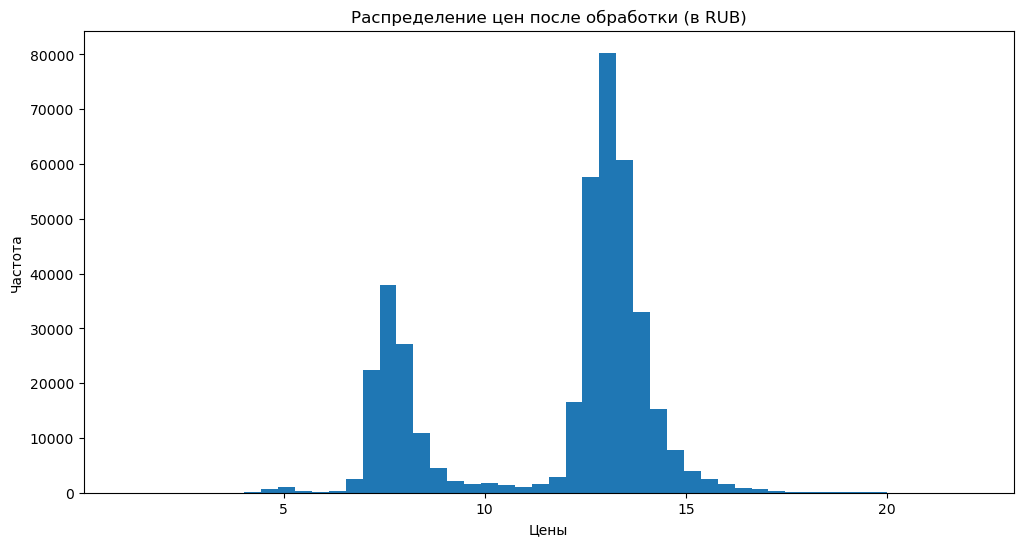

In [369]:
df_after = df.copy()

# Визуализация распределения цен после обработки
plt.figure(figsize=(12, 6))
plt.hist(np.log1p(df_after['price']), bins=50)
plt.title('Распределение цен после обработки (в RUB)')
plt.xlabel('Цены')
plt.ylabel('Частота')
plt.show()

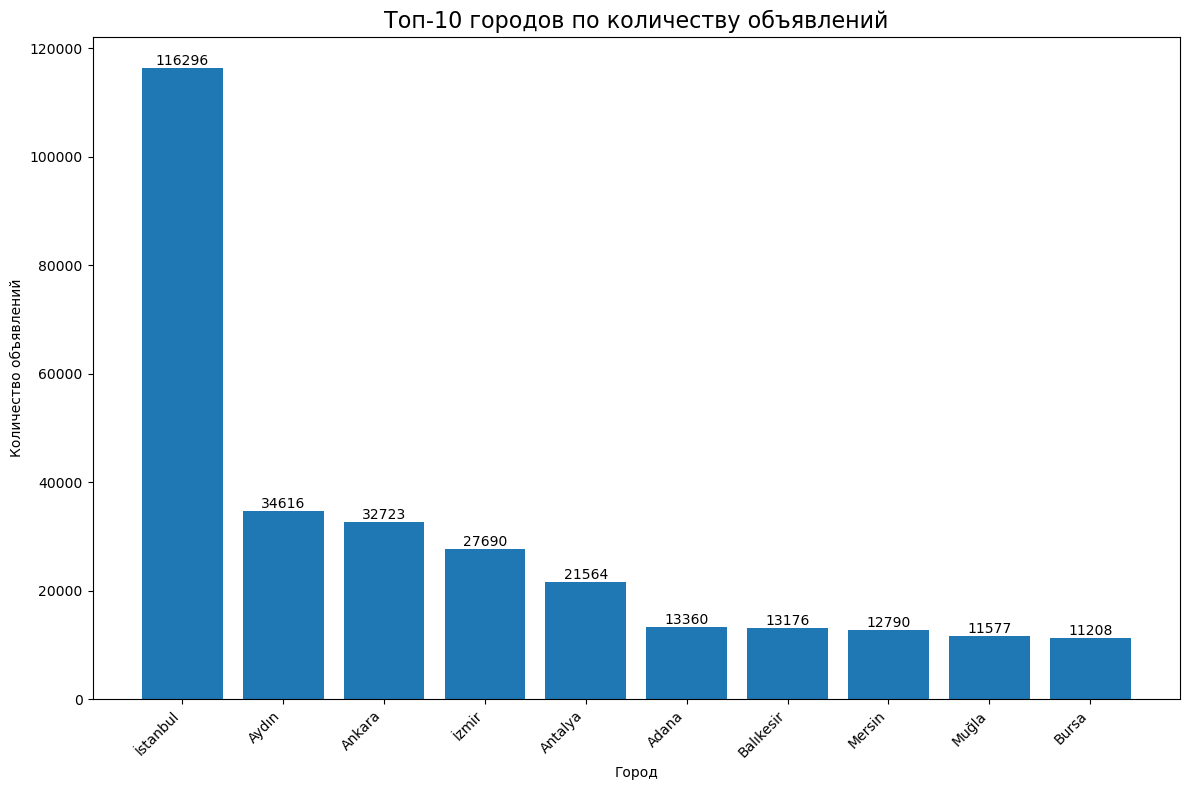

In [329]:
# Топ-10 городов по количеству объявлений
plt.figure(figsize=(12, 8))
city_counts = df['city'].value_counts().head(10)
bars = plt.bar(city_counts.index, city_counts.values)
plt.title('Топ-10 городов по количеству объявлений', fontsize=16)
plt.xlabel('Город')
plt.ylabel('Количество объявлений')
plt.xticks(rotation=45, ha='right')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{int(height)}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

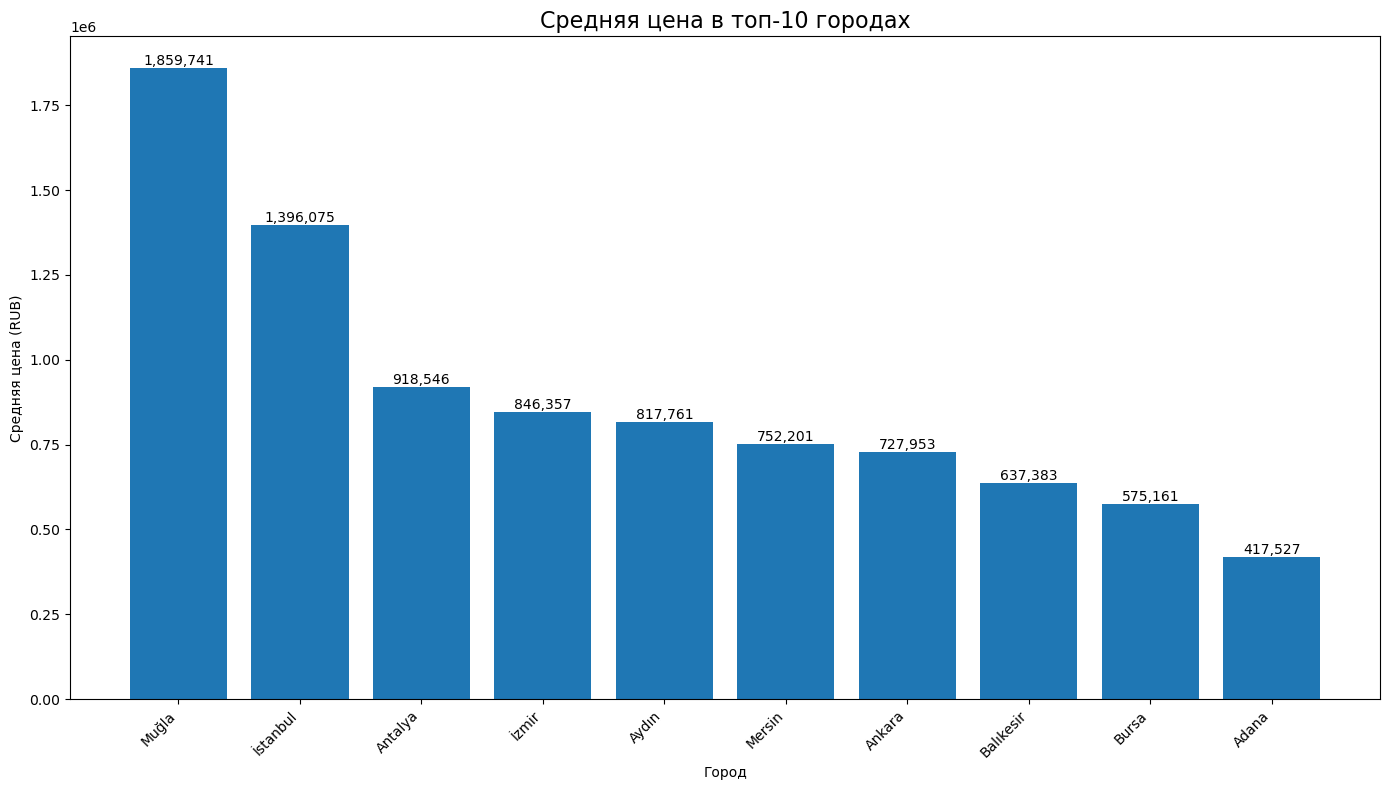

In [327]:
# Средняя цена в топ-10 городах
top_cities = df['city'].value_counts().head(10).index
city_prices = df[df['city'].isin(top_cities)].groupby('city')['price'].mean().sort_values(ascending=False)
plt.figure(figsize=(14, 8))
bars = plt.bar(city_prices.index, city_prices.values)
plt.title('Средняя цена в топ-10 городах', fontsize=16)
plt.xlabel('Город')
plt.ylabel('Средняя цена (RUB)')
plt.xticks(rotation=45, ha='right')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5, f'{int(height):,}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

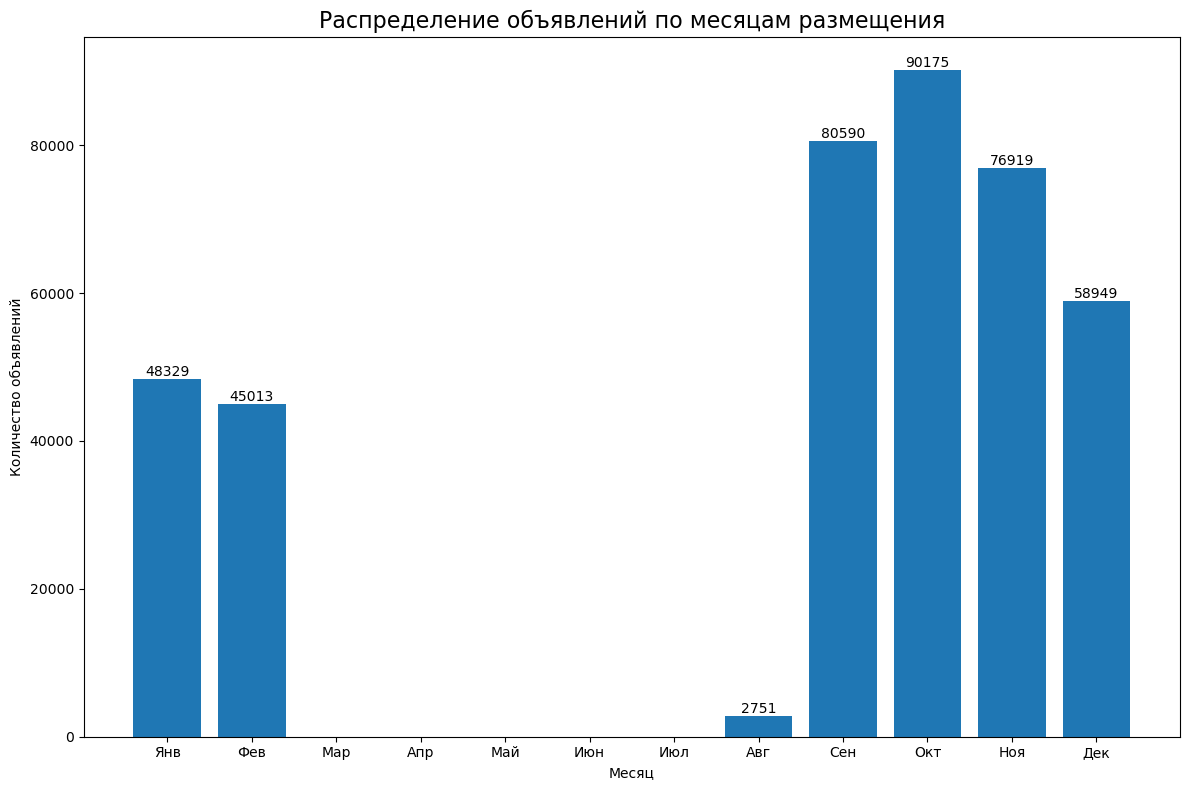

In [319]:
# Распределение по месяцам размещения
df['start_month'] = df['start_date'].dt.month
month_counts = df['start_month'].value_counts().sort_index()

plt.figure(figsize=(12, 8))
bars = plt.bar(month_counts.index, month_counts.values)
plt.title('Распределение объявлений по месяцам размещения', fontsize=16)
plt.xlabel('Месяц')
plt.ylabel('Количество объявлений')
plt.xticks(range(1, 13), ['Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июн', 'Июл', 'Авг', 'Сен', 'Окт', 'Ноя', 'Дек'])
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5, f'{int(height)}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

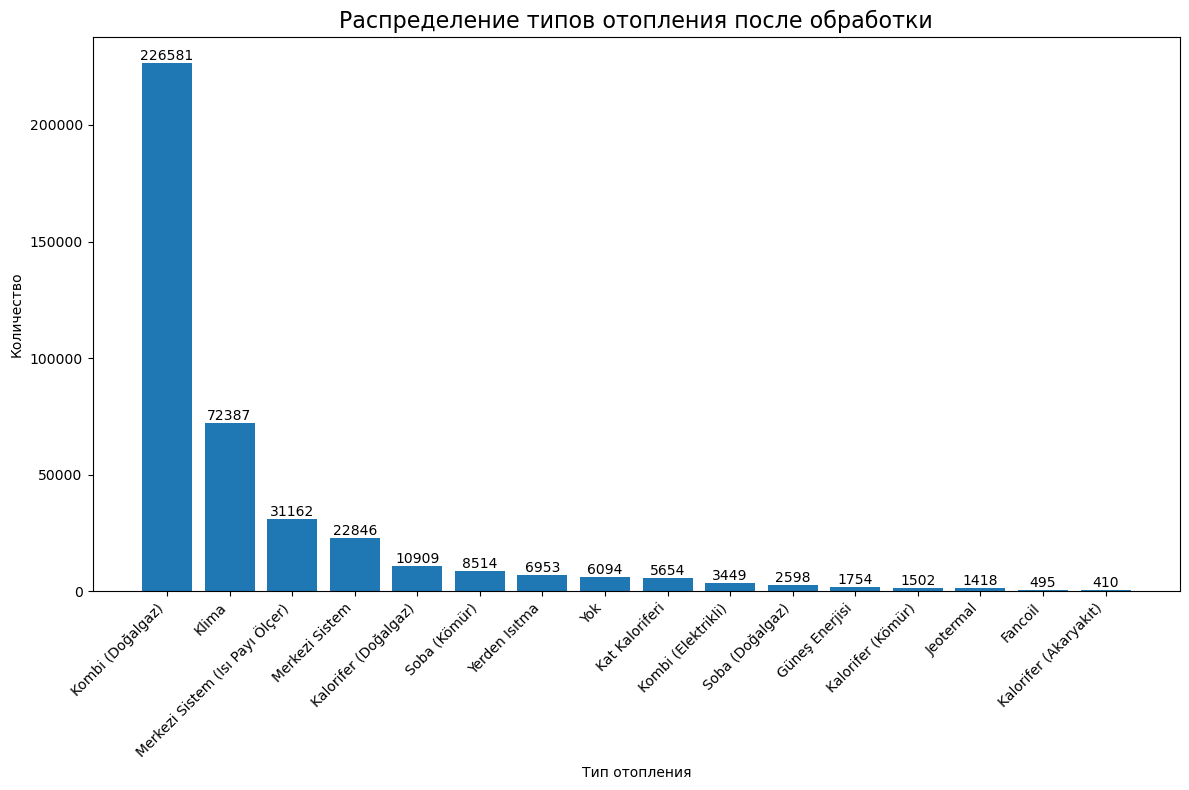

In [321]:
# Распределение типов отопления после обработки
plt.figure(figsize=(12, 8))
heating_counts = df['heating_type'].value_counts()
bars = plt.bar(heating_counts.index, heating_counts.values)
plt.title('Распределение типов отопления после обработки', fontsize=16)
plt.xlabel('Тип отопления')
plt.ylabel('Количество')
plt.xticks(rotation=45, ha='right')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5, f'{int(height)}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

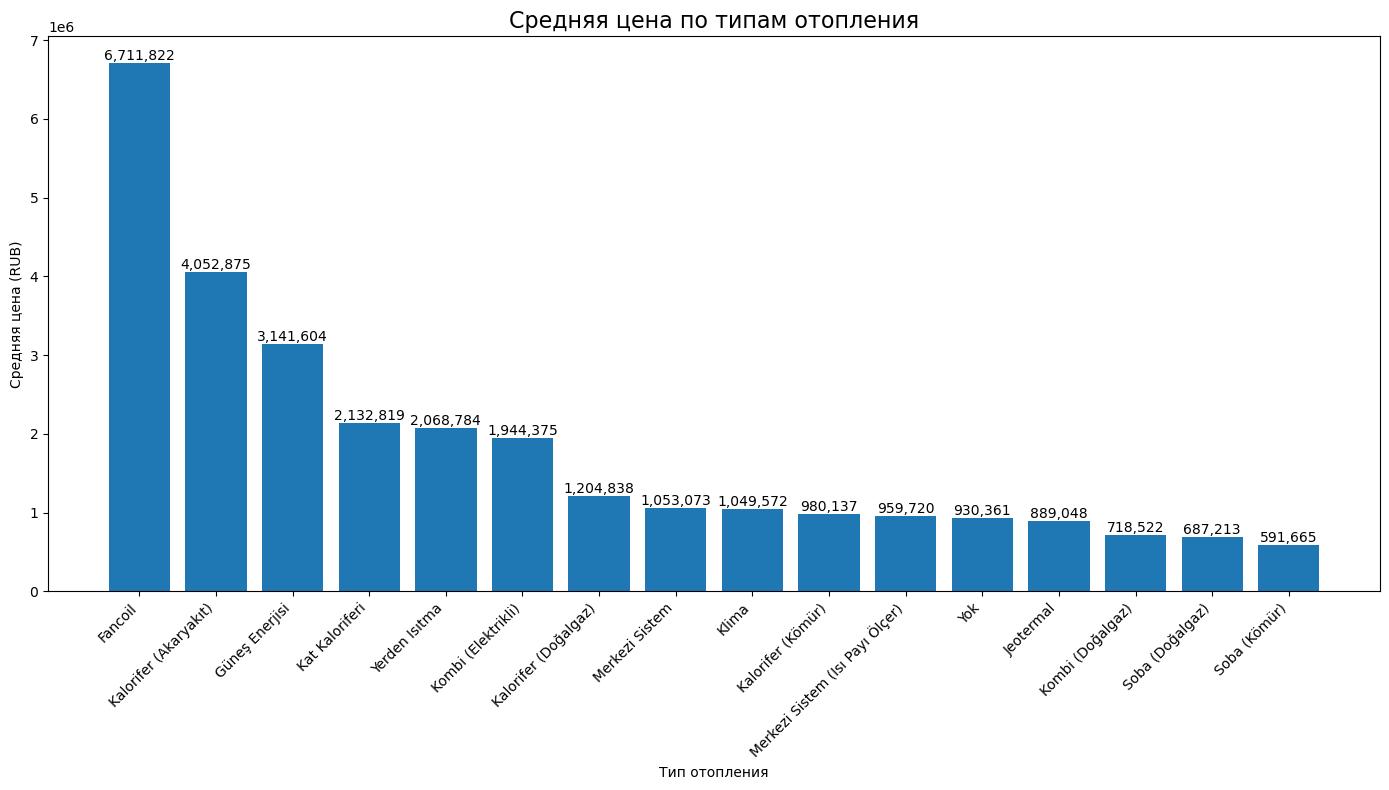

In [325]:
# Средняя цена по типам отопления
heating_prices = df.groupby('heating_type')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(14, 8))
bars = plt.bar(heating_prices.index, heating_prices.values)
plt.title('Средняя цена по типам отопления', fontsize=16)
plt.xlabel('Тип отопления')
plt.ylabel('Средняя цена (RUB)')
plt.xticks(rotation=45, ha='right')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5, f'{int(height):,}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

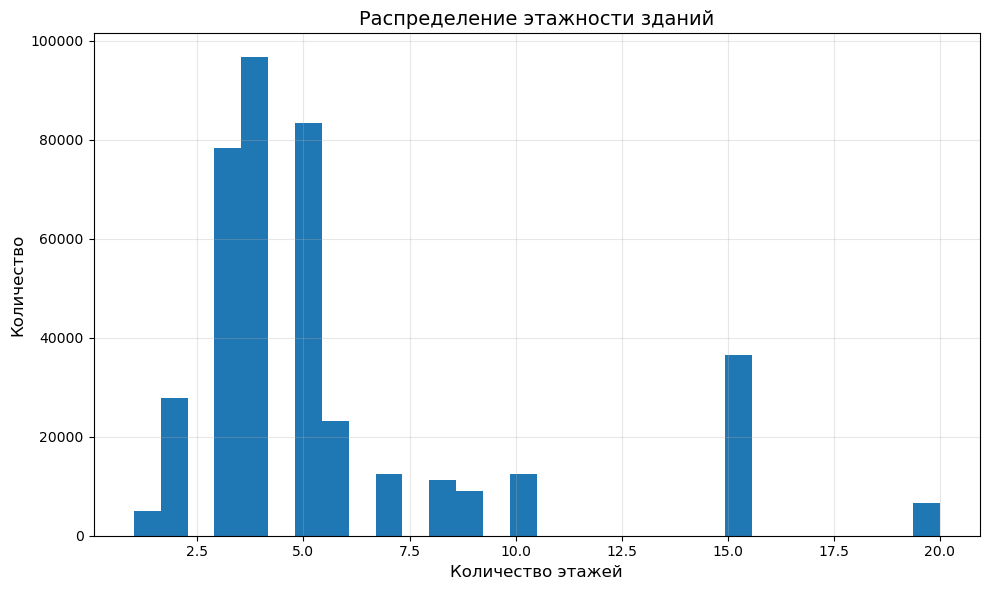

In [357]:
# 2. Распределение этажности
plt.figure(figsize=(10, 6))
plt.hist(df['total_floor_count'], bins=30)
plt.title('Распределение этажности зданий', fontsize=14)
plt.xlabel('Количество этажей', fontsize=12)
plt.ylabel('Количество', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

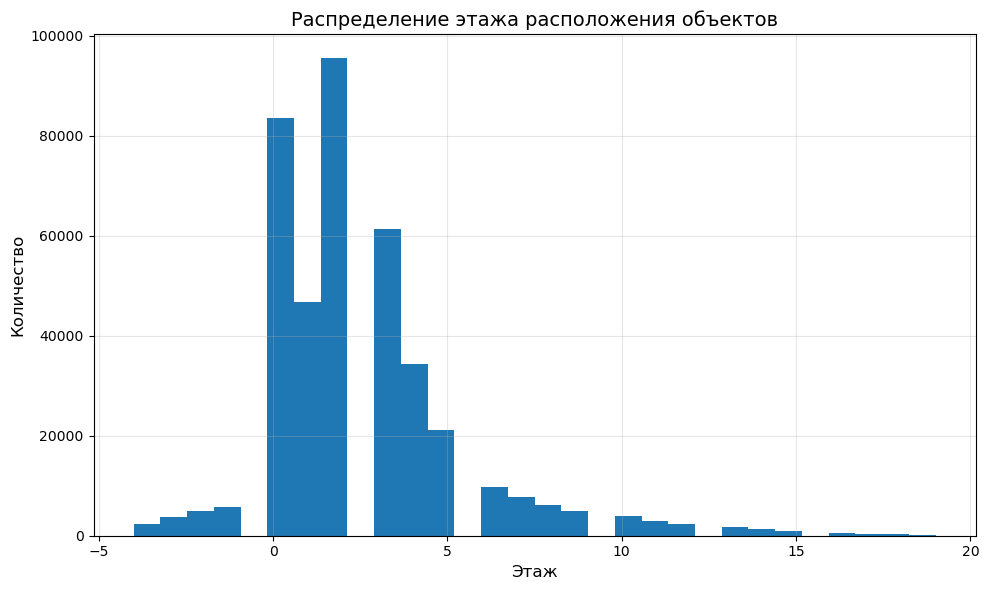

In [355]:
# Распределение этажа расположения
plt.figure(figsize=(10, 6))
plt.hist(df['floor_no'], bins=30)
plt.title('Распределение этажа расположения объектов', fontsize=14)
plt.xlabel('Этаж', fontsize=12)
plt.ylabel('Количество', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

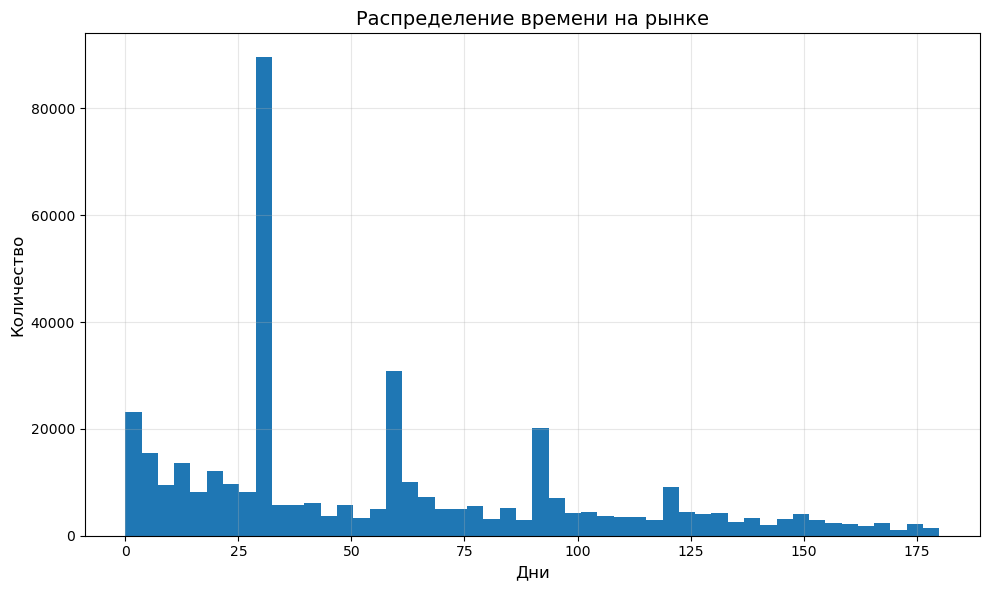

In [359]:
# Распределение времени на рынке
plt.figure(figsize=(10, 6))
plt.hist(df['tom'], bins=50)
plt.title('Распределение времени на рынке', fontsize=14)
plt.xlabel('Дни', fontsize=12)
plt.ylabel('Количество', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

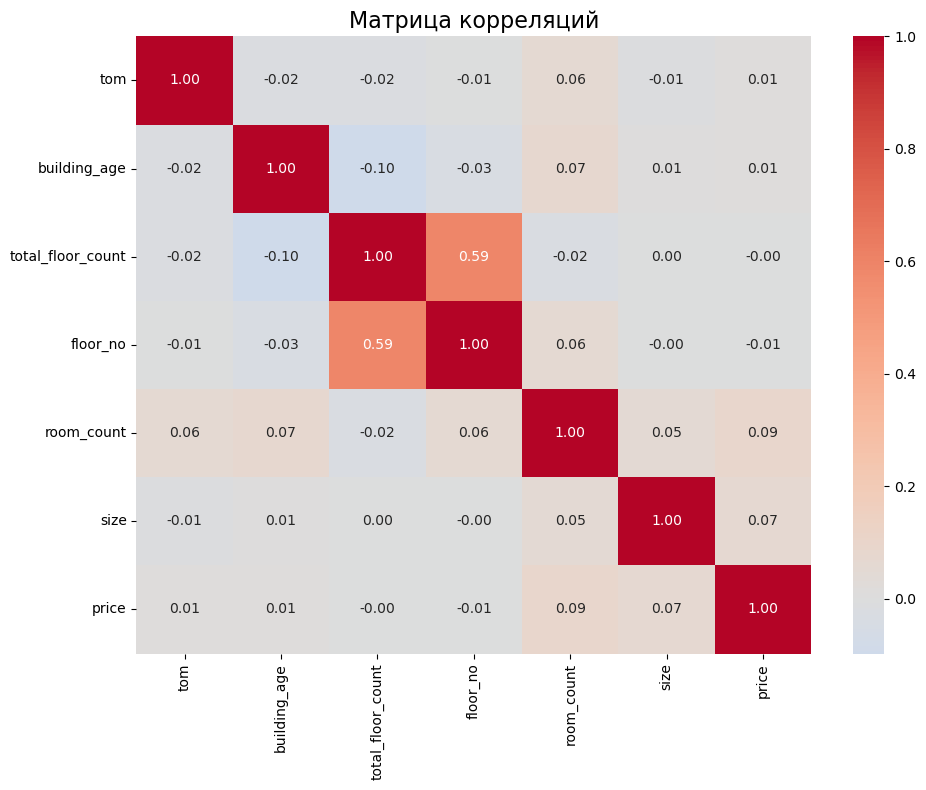

In [363]:
# Матрица корреляций
numeric_cols = ['tom', 'building_age', 'total_floor_count', 'floor_no', 'room_count', 'size', 'price']
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Матрица корреляций', fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
# Пример: логарифмирование цены для лучшего выявления зависимостей
df['log_price'] = np.log1p(df['price'])

# Проверка корреляции с логарифмом цены
numeric_cols = ['tom', 'building_age', 'total_floor_count', 'floor_no', 'room_count', 'size', 'log_price']
correlation_matrix_log = df[numeric_cols].corr()
print(correlation_matrix_log['log_price'].sort_values(ascending=False))

In [ ]:
# Сохраняем обработанный датасет в CSV файл
df.to_csv('turkey_processed.csv', index=False, encoding='utf-8')